In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
import os
train_df = pd.read_csv('C:/Users\lenovo\Downloads/train.csv')
test_df = pd.read_csv('C:/Users\lenovo\Downloads/test.csv')
combine = [train_df, test_df]

In [56]:
train_df0 = train_df.copy()

In [57]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values)
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


Survived가 Train에는 있는것 같지만 Test 에는 안보인다.

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [62]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [63]:
train_df['Age'] = train_df['Age'].fillna(0)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [64]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes

train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes
#"sex"와 "Embarked" 데이터를 카테고리형 데이터로 바꾸고 다시 numerical 데이터로 변경해주기
#머신 러닝을 하기 위해서는 숫자로만 가능하기 때문이다.

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 36.7 KB


In [66]:
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')
    
#Label 과의 연관성

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


In [67]:
df=pd.DataFrame()
df['Age']=train_df['Age']
df['Survived']=train_df['Survived']
df=df[df['Age']!=0]
df
#Age 가 아무래도 변수가 조금 많다 보니 위에 Label 과의 연관성에서 확인 을 할 때 잘려 보여서 한번 더 확인을 하는 과정을 거쳐보고 싶었다.

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [68]:
df['Age'].value_counts()
#나이 종류 88개

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [69]:
df.groupby(df['Age']).mean().sort_values(by="Age",ascending=False).head(50)

,Survived
Age,
80.0,1.000000
74.0,0.000000
71.0,0.000000
70.5,0.000000
70.0,0.000000
66.0,0.000000
65.0,0.000000
64.0,0.000000
63.0,1.000000


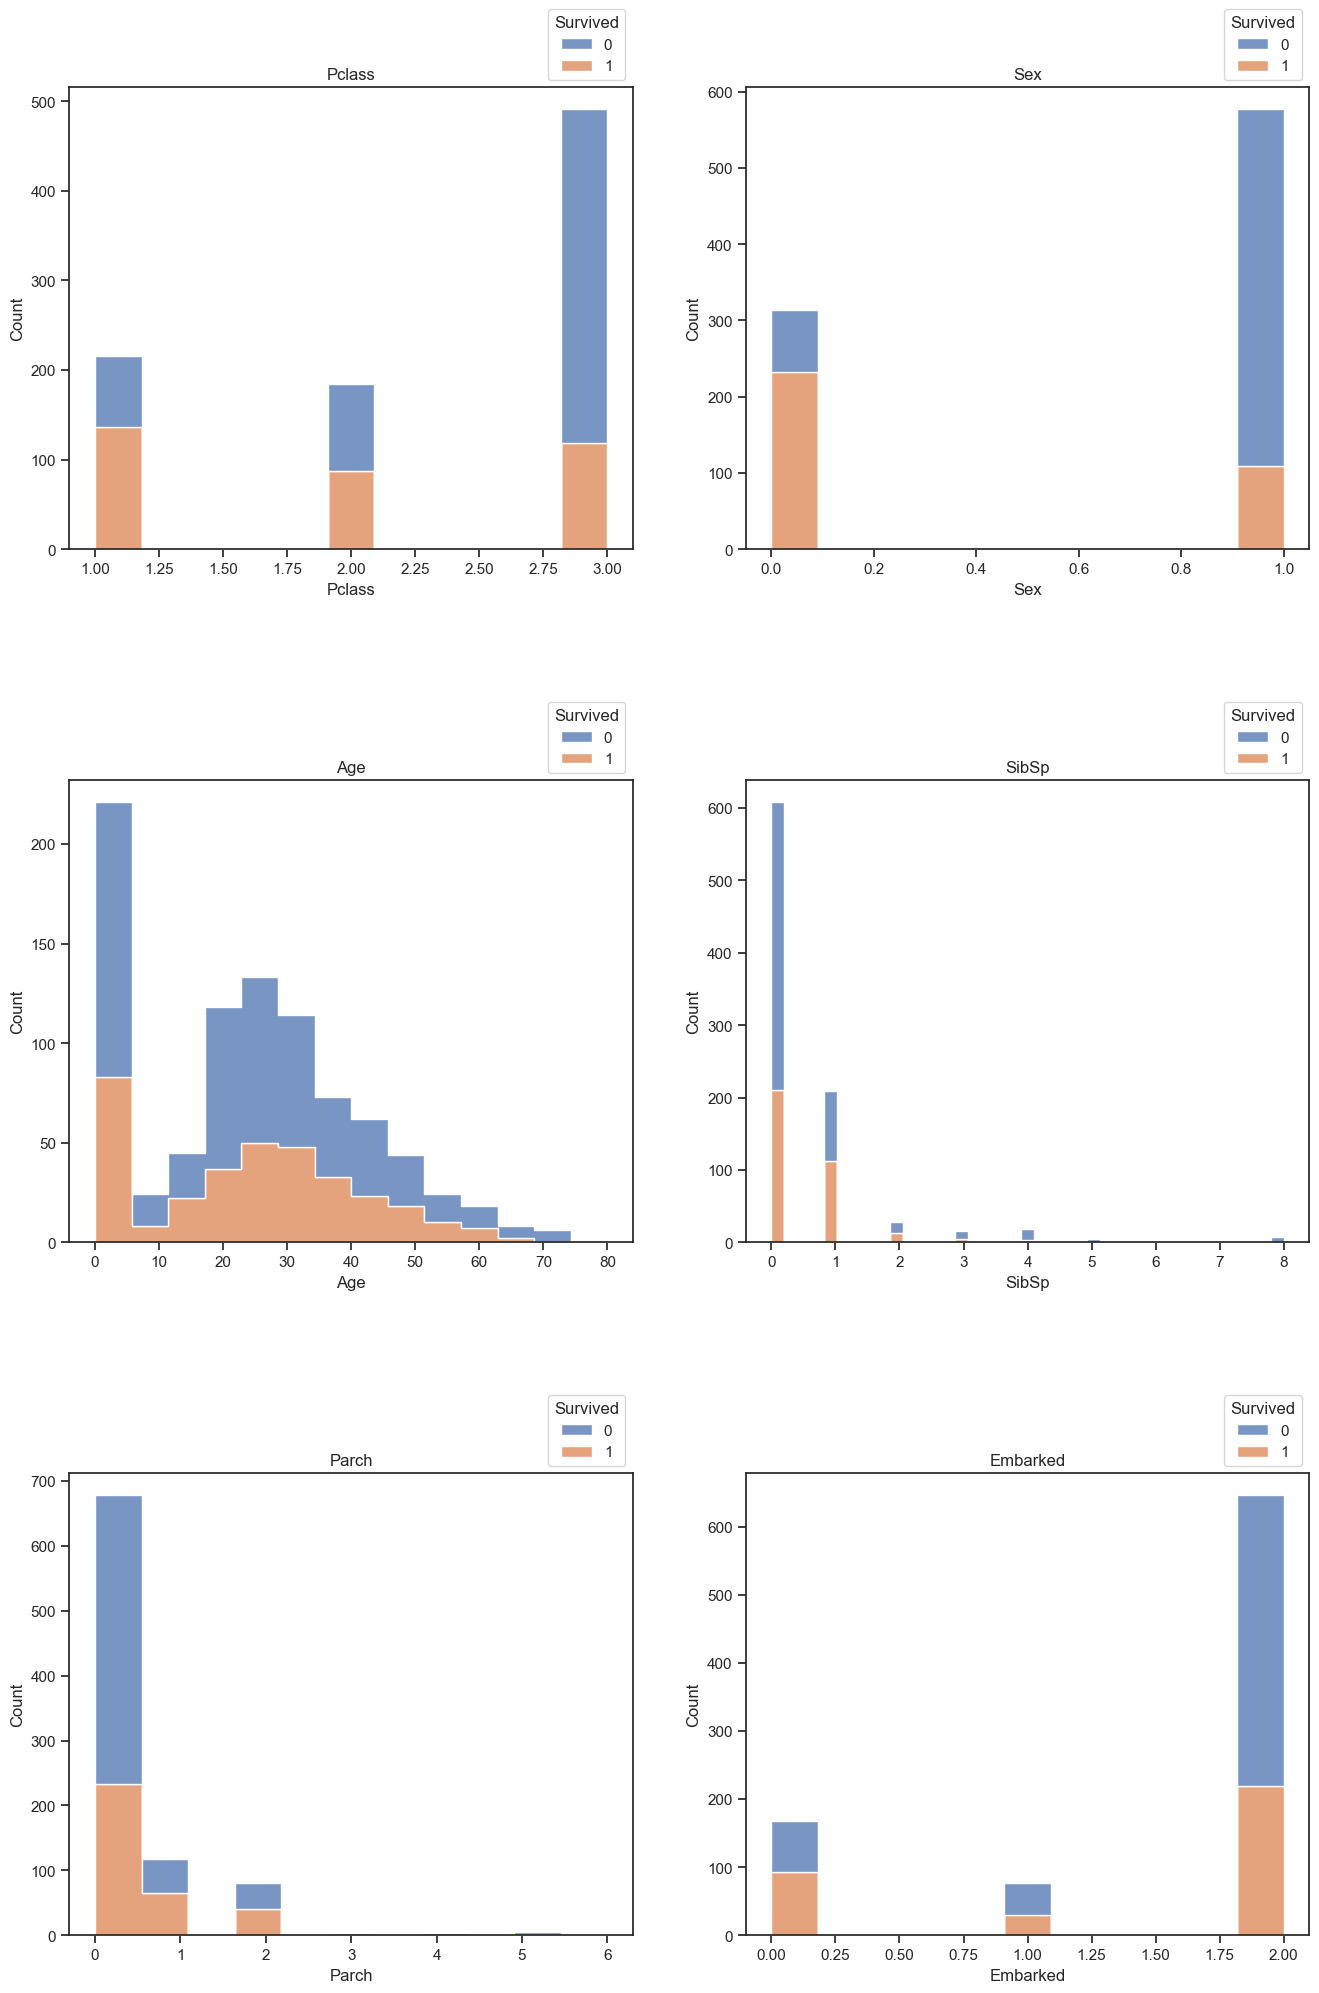

In [70]:
col_name = train_df.columns[1:]
fig, axs = plt.subplots(3,2, figsize=(16,24))
fig.subplots_adjust(hspace = .5)

axs = axs.ravel() #차원 편평화
for i in range(col_name.shape[0]):
    
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',multiple="stack",ax=axs[i], element="step")
    sns.move_legend(axs[i],"lower right",  # 범례 창 옮기기
                   bbox_to_anchor=(1,1)    # 바깥으로 옮기기
                   )
    axs[i].set_title(col_name[i])

<Figure size 900x900 with 0 Axes>

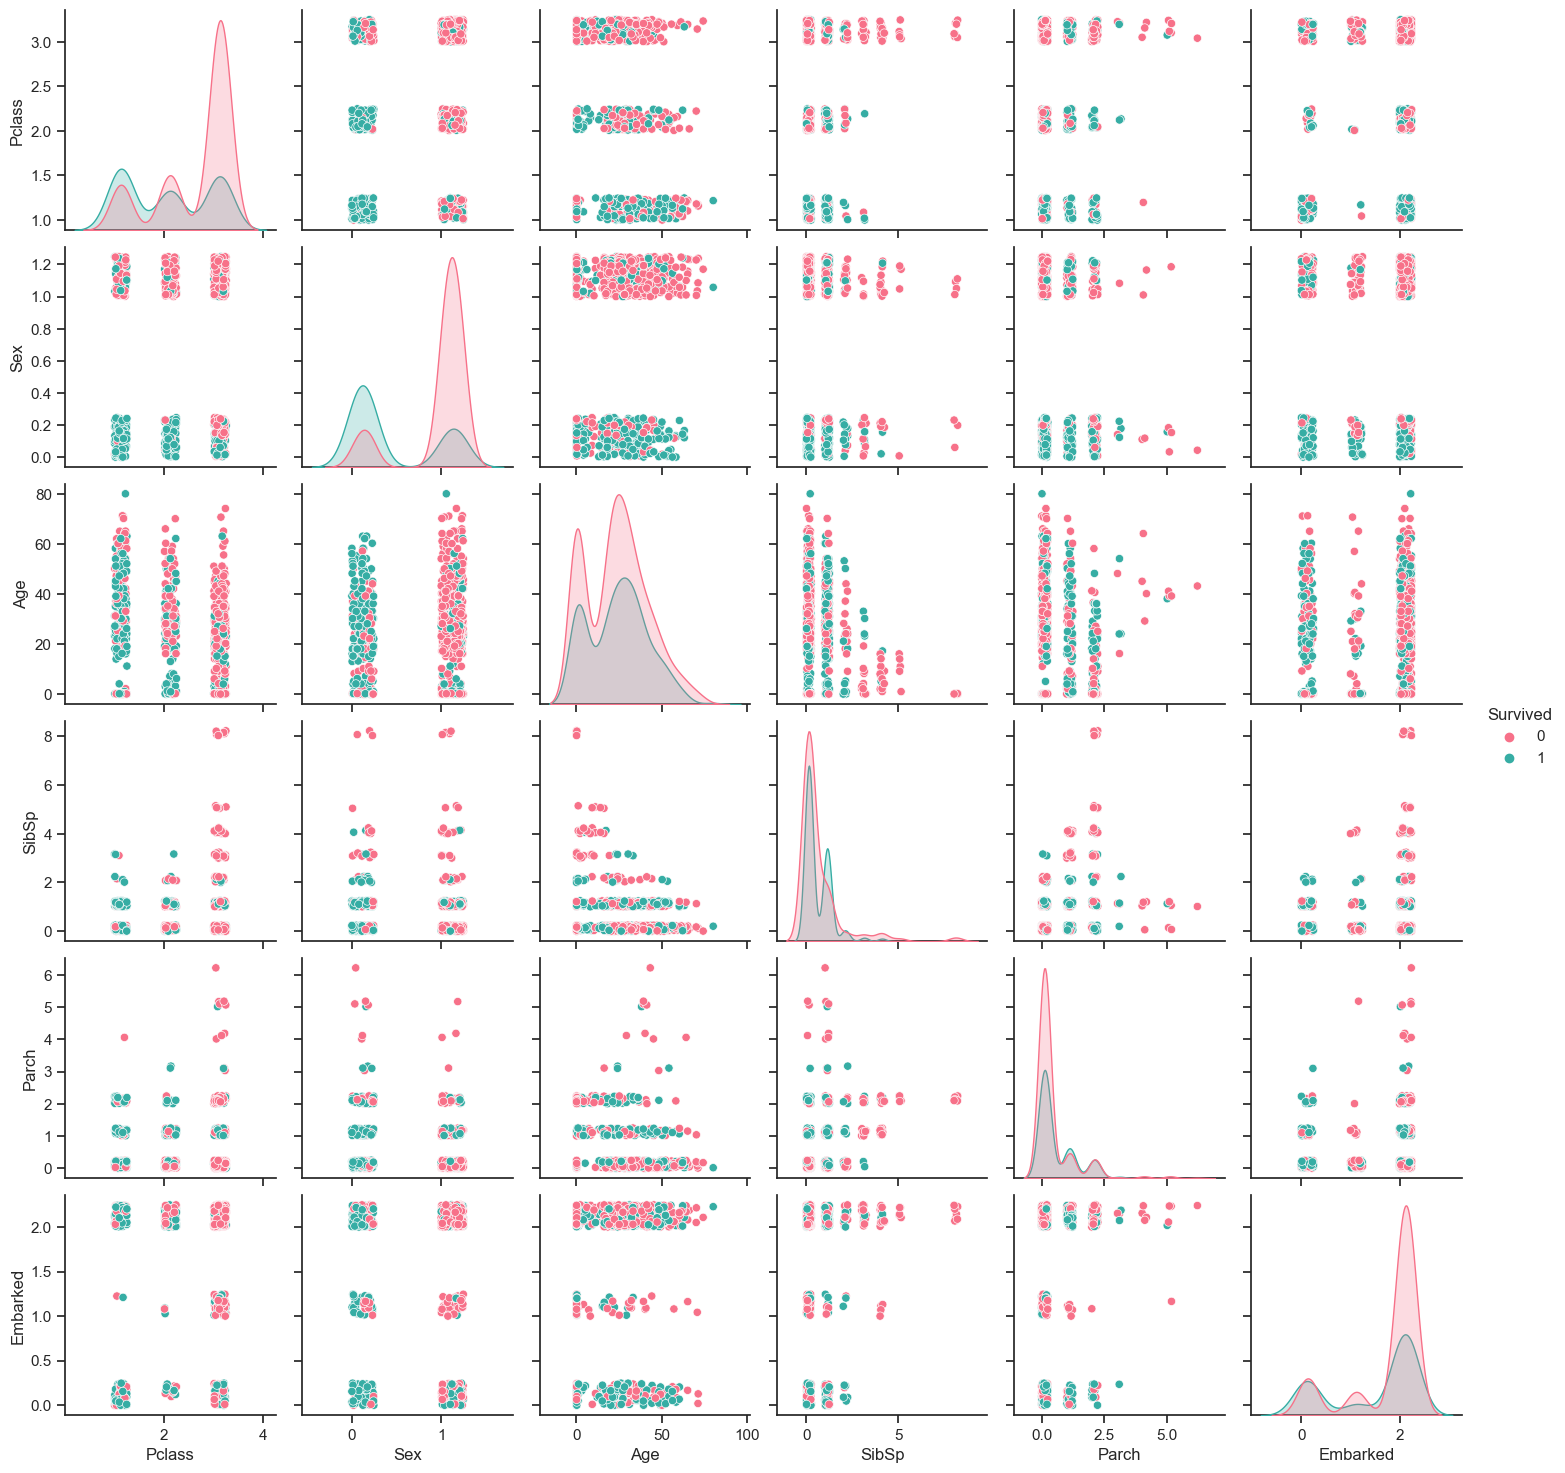

In [71]:
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400

train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
train_df_rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='husl')

처음에는 왜 이런 코드가 있나 했는데, 영상을 다시 보니까, 알 수 있었다.   
이산적인 데이터로는 이렇게 매끈한 그래프를 그릴 수가 없고, 해봐야 위에 있는 히스토그램 정도를 그릴 수 있는데,   
원래 있는 데이터 값(train_df)에 작은 랜덤한 값을 더 해주어서 연속적(이산적이 아닌)확률 변수로 만들어 주어서   
위와 같은 그래프를 그릴 수 있게 되었다.   
Pairplot을 통해 보다 다양하게 시각화를 할 수 있었다.

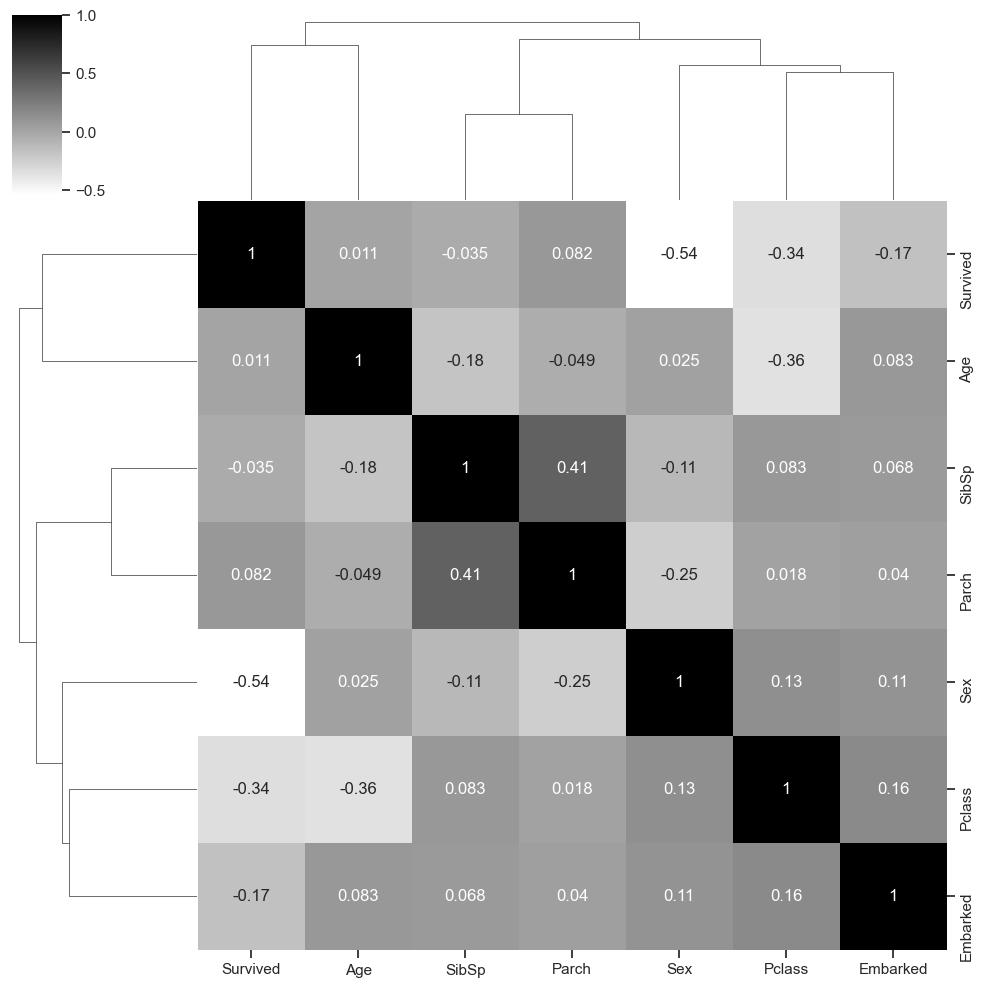

In [72]:
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'binary')

Survived 기준으로 좀 진하게 나오는 것들은 보면 Parch와 Sex 정도가 있다. 

In [73]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)

(891, 6) (891,)


In [74]:
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
test_df['Age'] = test_df['Age'].fillna(0)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
print('The most frequent value:',test_df['Embarked'].mode()[0])
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

test_df.info()
X_test = test_df.copy()
print(X_test.shape)

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int8   
dtypes: float64(1), int64(3), int8(2)
memory usage: 14.0 KB
(418, 6)


In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn
print(sklearn.__version__)

1.2.0


In [76]:
def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

In [77]:
models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8754203633956852
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8703704871015019
model: SGDClassifier(max_iter=100)
Score: 0.6868454228847882
model: SGDClassifier()
Score: 0.7137467103708023
model: LogisticRegression()
Score: 0.7946152512725153
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9203141497391936
model: RandomForestClassifier()
Score: 0.9424815229210332


AUC: 0.9983552631578947


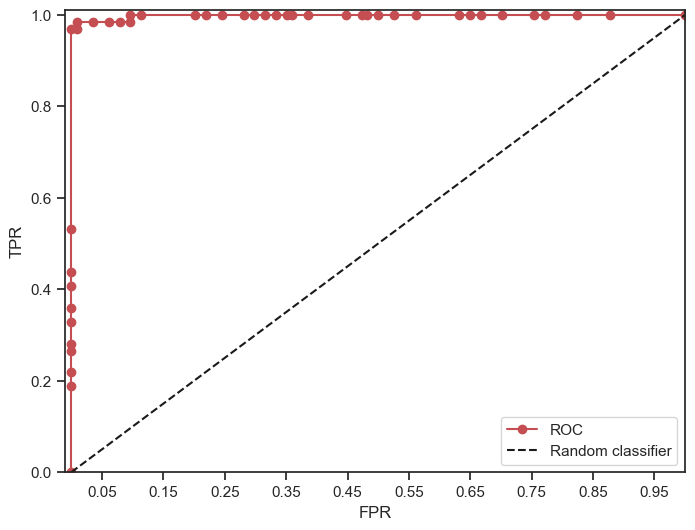

In [80]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(8,6))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, y_val)    

print("AUC:",roc_auc_score(y_pred,pred_proba_class1))

오늘 해본 타이타닉 관련 Exploration은 그렇게 복잡하지는 않았다.      
하지만, 코딩 센스가 조금 필요했던 것 같다. 예를 들면 데이터 시각화를 할 때, 랜덤 변수들을 추가해 이산 데이터를 연속 데이터로 변환 하는 것 말이다.   
다음번에 기회가 되면 해보고 싶은 것은 모델 별로 그리드 서치를 한 번 해보고 싶다.   
그리드 서치를 통해서 파라미터와 모델의 결과값의 관계를 어느 정도 파악해볼 수 있지 않을까 싶다.